In [99]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [100]:
# init lists for storing iteration id & training loss
iter_v1_1024x512 = []
loss_v1_1024x512 = []

iter_v1_1024x1024 = []
loss_v1_1024x1024 = []

iter_v2_1024x512 = []
loss_v2_1024x512 = []

iter_v2_1024x1024 = []
loss_v2_1024x1024 = []

In [101]:
# read CSVs to lists
import csv
with open('v1_1024x512-Train_loss.csv')as f:
    f_csv = csv.reader(f)
    headings = next(f_csv)
    for row in f_csv:
        iter_v1_1024x512.append(int(row[0]))
        loss_v1_1024x512.append(float(row[3]))

with open('v1_1024x1024-Train_loss.csv')as f:
    f_csv = csv.reader(f)
    headings = next(f_csv)
    for row in f_csv:
        iter_v1_1024x1024.append(int(row[0]))
        loss_v1_1024x1024.append(float(row[3]))
        
with open('v2_1024x512-Train_loss.csv')as f:
    f_csv = csv.reader(f)
    headings = next(f_csv)
    for row in f_csv:
        iter_v2_1024x512.append(int(row[0]))
        loss_v2_1024x512.append(float(row[3]))
        
with open('v2_1024x1024-Train_loss.csv')as f:
    f_csv = csv.reader(f)
    headings = next(f_csv)
    for row in f_csv:
        iter_v2_1024x1024.append(int(row[0]))
        loss_v2_1024x1024.append(float(row[3]))

In [102]:
# data smoothing algorithms
import numpy as np

# moving average
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size), 'valid') / window_size

# savgol_filter
from scipy.signal import savgol_filter

In [134]:
# smooth data by moving average
MA_windows_size = 1001  # set window size

# run moving average on iteration id & training loss
MA_iter = moving_average(iter_v1_1024x512, windows_size)

MA_loss_v1_1024x512 = moving_average(loss_v1_1024x512, windows_size)
MA_loss_v1_1024x1024 = moving_average(loss_v1_1024x1024, windows_size)
MA_loss_v2_1024x512 = moving_average(loss_v2_1024x512, windows_size)
MA_loss_v2_1024x1024 = moving_average(loss_v2_1024x1024, windows_size)

In [135]:
# smooth data by savgol_fiter
SAV_window_size = 1001  # set window size
SAV_poly_order = 3  # set polynomial order

# run savgol fiter on training loss
SAV_loss_v1_1024x512 = savgol_filter(loss_v1_1024x512, SAV_window_size, SAV_poly_order)
SAV_loss_v1_1024x1024 = savgol_filter(loss_v1_1024x1024, SAV_window_size, SAV_poly_order)
SAV_loss_v2_1024x512 = savgol_filter(loss_v2_1024x512, SAV_window_size, SAV_poly_order)
SAV_loss_v2_1024x1024 = savgol_filter(loss_v2_1024x1024, SAV_window_size, SAV_poly_order)

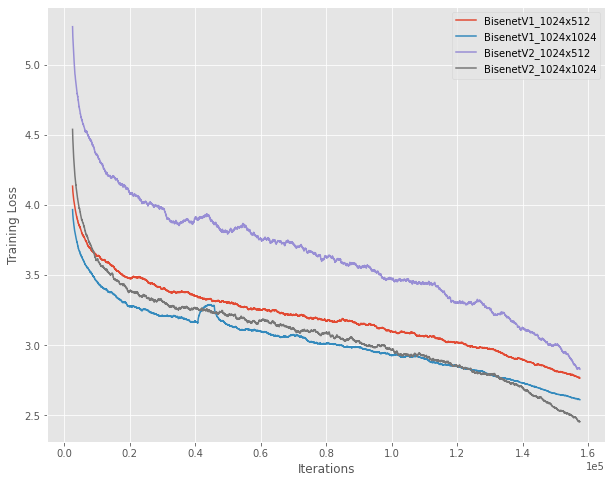

In [136]:
# plot results with data smoothed by moving average
plt.figure(figsize=(10, 8))
plt.plot(MA_iter,MA_loss_v1_1024x512, label = 'BisenetV1_1024x512')
plt.plot(MA_iter,MA_loss_v1_1024x1024, label = 'BisenetV1_1024x1024')
plt.plot(MA_iter,MA_loss_v2_1024x512, label = 'BisenetV2_1024x512')
plt.plot(MA_iter,MA_loss_v2_1024x1024, label = 'BisenetV2_1024x1024')

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

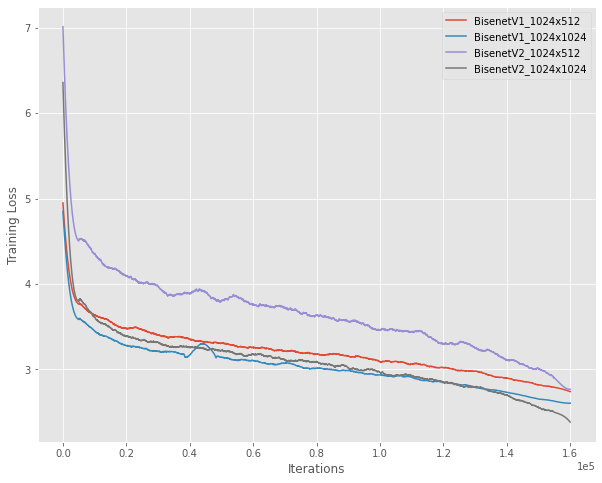

In [137]:
# plot results with data smoothed by savgol_filter
plt.figure(figsize=(10, 8))
plt.plot(iter_v1_1024x512, SAV_loss_v1_1024x512, label = 'BisenetV1_1024x512')
plt.plot(iter_v1_1024x512, SAV_loss_v1_1024x1024, label = 'BisenetV1_1024x1024')
plt.plot(iter_v1_1024x512, SAV_loss_v2_1024x512, label = 'BisenetV2_1024x512')
plt.plot(iter_v1_1024x512, SAV_loss_v2_1024x1024, label = 'BisenetV2_1024x1024')

plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.legend()
plt.show()